Enchérir ou négocier : quelle forme préférable de marché ?
Sylvain Mignot et Annick Vignes

Ce notebook est une simulation du marché décrit dans l’article, les graphes résultants font référence à ceux fournis dans la section 4 de l’article.

Le notebook contient deux parties principales:
1. Equilibre du marché au cas de la non-différenciation des biens.
2. Equilibre du marché au cas de la différenciation des biens.

In [27]:
import numpy as np
import random as rd
import matplotlib.pyplot as plt

#  1. Equilibre du marché au cas de la non-différenciation des biens.

In [40]:
class marché0():
    def __init__(self,prix_a,prix_n):
        self.prix_a=prix_a
        self.prix_n=prix_n
    
    # Codes pour les vendeurs
    def revision_vend(self,p_t,offre,dict,coeff):
        """
        Met à jour les prix planchers des vendeurs sur le marché négocié(formules 8 et 9 dans la section 3.2). 
        Elle retourne une liste de ces nouveaux prix pour chaque vendeur.

        Parameters: 
        -----------
        p_t: liste de réels
            Liste de prix planchers au marché négocié à l’instant t.
        offre: liste de réels
            L’offre de chaque vendeur à l’instant t.
        dict: dictionnaire
            C’est la sortie de la fonction transactions_négocié.
        coeff: réel entre 0 et 1
            Le coefficient d’apprentissage.
        """       
        p=[]
        for i in range(200):
            if len(dict[i])!=0:
                D_sum=sum(a[1] for a in dict[i])
                P=p_t[i]*(1+coeff*np.tanh(D_sum/offre[i]-len(dict[i])))    
            else:
                P=p_t[i]*(1+coeff*np.tanh(-1))  
            p.append(P)
        return(p)
    
    def profit_t(self,p_t,offre):
        """
        Elle calcule le profit estimé pour chaque vendeur sur un marché donné (encheres ou négocié) (section 3.1.2 )

        Parameters: 
        -----------
        p_t: liste de réels
            Liste de prix planchers à l’instant t.
        offre: liste de réels
            L’offre de chaque vendeur à l’instant t.
        """ 
        profit=[]
        for i in range(len(p_t)):
            p_1=offre[i]*p_t[i]           
            profit.append(p_1)
        return(profit)

    def rapports_t(self,p_t_n,offre):
        """
        Elle calcule les rapports définis dans la section 3.1.4 (formule 6). Sa sortie est une liste contenant le rapport de chaque vendeur.

        Parameters: 
        -----------
        p_t_n: liste de réels
            Liste de prix planchers au marché négocié à l’instant t.
        offre: liste de réels
            L’offre de chaque vendeur à l’instant t.
        """ 
        profits_n=self.profit_t(p_t_n,offre)
        profits_a=self.profit_t(self.prix_a,offre)
        R=[]
        for i in range (200):
            r=(profits_a[i]-profits_n[i])/(profits_a[i]+profits_n[i])
            R.append(r)
        return(R)

    def marchés_t(self,R_t):
        """
        Elle détermine le marché choisi par chaque vendeur (section 3.1.4)

        Parameters: 
        -----------
        R_t: liste de réels
            Liste des rapports calculés par la fonction rapports_t.
        """ 
        marchés=[]
        for r in R_t:
            p=0.5*(1+r)
            marchés.append(Ber(p))
        return(marchés)

    def offre_en_négocié(self,marchés,offre):
        """
        Elle calcule l’offre totale sur le marché négocié en un instant t donné. Elle retourne un réel.

        Parameters: 
        -----------
        marchés: liste de réels
            Liste des marchés choisis par chaque vendeur (sortie de la fonction marchés_t).
        offre: liste de réels
            L’offre de chaque vendeur à l’instant t.
        """ 
        S=0
        for i in range (200):
            if marchés[i]=="négocié":
                S+=offre[i]
        return S
    
    def marché_offre_t(self,offre,R_t,prix_n):
        """
        Elle retourne un dictionnaire, les clés sont les vendeurs numérotés de 0 à 199.
        Chaque clé est associée à un tuple de la forme:(marché choisi,l’offre,prix plancher au marché négocié)

        Parameters: 
        -----------
        offre: liste de réels
            L’offre de chaque vendeur à l’instant t.
        R_t: liste de réels
            Liste des rapports calculés par la fonction rapports_t.
        p_n: liste de réels
            Liste de prix planchers au marché négocié à l’instant t.
        """ 
        dict={}
        for i in range(200):
            dict[i]=(self.marchés_t(R_t)[i], offre[i],prix_n[i])
        return(dict)
    
    # Codes pour les acheteurs
    
    def couts(self,demande,reserve):
        """
        Cette fonction calcule les couts espérés (section 3.1.3 )

        Parameters: 
        -----------
        demande: liste de réels
            Les demandes de tous les acheteurs.
        reserve:
            Les prix de réserve de tous les acheteurs sur un marché donné.
        """ 
        couts=[]
        for i in range(100):
            c=demande[i]*reserve[i]
            couts.append(c)
        return (couts)
    
    def rapport_achet(self,demande,reserve_n,reserve_a):
        """
        Calcule les rapports définis par la formule 7 section 3.1.4

        Parameters: 
        -----------
        demande: liste de réels
            Les demandes de tous les acheteurs.
        reserve_n:
            Les prix de réserve de tous les acheteurs sur le marché négocié.
        reserve_a:
            Les prix de réserve de tous les acheteurs sur le marché des encheres.
        """ 
        rapports=[]
        couts_n=self.couts(demande,reserve_n)
        couts_a=self.couts(demande,reserve_a)        
        for i in range (100):
            rapports.append((couts_n[i]-couts_a[i])/(couts_a[i]+couts_n[i]))
        return(rapports)
    
    def dict_achet(self,rapp,demande,reserve_n,reserve_a):
        """
        Elle retourne un dictionnaire. Les clés sont les acheteurs numérotés de 0 à 99.
        Chaque clé est associée à un tuple de la forme (le marché choisi, la demande, le prix de réserve dans le marché négocier, 
                                                            le prix de réserve dans le marché des encheres)

        Parameters: 
        -----------
        rapp: liste de réels.
            Sortie de la fonction rapport_achet.
        demande: liste de réels
            Les demandes de tous les acheteurs.
        reserve_n:
            Les prix de réserve de tous les acheteurs sur le marché négocié.
        reserve_a:
            Les prix de réserve de tous les acheteurs sur le marché des encheres.
        """ 
        dict={}
        marchés=self.marchés_t(rapp)
        for i in range(100):
            dict[i]=(marchés[i],demande[i],reserve_n[i],reserve_a[i])
        return(dict)
    
def transactions_négocié0(dict_achet,dict_vend,k=3):
    """
        Cette fonction retourne un dictionnaire, ses clés sont les vendeurs, chaque clé est associée à une liste de tuples, chaque tuple 
        contient le numéro d’un acheteur qui a visité ce vendeur, avec sa demande et son prix de réserve sur le marché négocié.
        
        Elle retourne également la liste des nouveaux prix de réserve des acheteurs sur le marché négocié.

        Parameters: 
        -----------
        demande: liste de réels
            Les demandes de tous les acheteurs.
        reserve_n:
            Les prix de réserve de tous les acheteurs sur le marché négocié.
        reserve_a:
            Les prix de réserve de tous les acheteurs sur le marché des encheres.
        """
    dicti={}
    reserve=[]
    for i in range(200):
        dicti[i]=[]
    for key,elem in dict_achet.items():
        c=1
        vendu=elem[1]
        if elem[0]=="négocié":
                i=0
                d=elem[1]
                c=0
                vendu=0
                while i<=k and d>0 :                
                    v=rd.randint(0,199)
                    if key not in (dicti[v][i][0] for i in range (len(dicti[v]))):
                        dicti[v].append((key,d,elem[2]))
                        vendu+=dict_achet[key][2]*dict_vend[v][1]
                        c+=dict_vend[v][1] 
                        if dict_vend[v][2]<=dict_achet[key][2]:
                            d=max(d-dict_vend[v][1],0)    
                        i=i+1
        reserve.append(vendu/c)
    return(dicti,reserve)

def Ber(param):
    """
        C’est une simulation de la loi de Bernouilli de parametre param.
        Parameters: 
        -----------
        param: réel
            La probabilité de retourner "encheres"
        """
    s=0
    for i in range(50):
        s+=rd.random()
    if s/50<param:
        return("encheres")   
    return("négocié") 
   

def test0(coeff,jours,k):
    """
        Cette fonction fait appel à toutes les fonctions précédentes et retourne 5 valeurs:
            marchés: liste de réels, marchés choisis chaque jour par un vendeur quelconque.
            jours: réel, c’est le nombre de jours donné en entrée.
            pourcentages: liste de réels,  le pourcentage de quantités mises en vente au marché négocié.
            switch_moy: liste de réels,  le taux de switchs pour chaque vendeur.
            moy: réel,  la moyenne des taux de switch de tous les vendeurs.
        
        Parameters: 
        -----------
        coeff: réel
            Coefficient d’apprentissage.
        jours: entier
            Nombre de jours de la simulation.
        k: entier
            Nombre maximal de vendeurs en marché négocié qu’un acheteur peut consulter en un jour.
        """
    prix_n=[rd.randint(9,12) for i in range(200)]
    prix_a=[rd.randint(9,12)for i in range(200)]
    reserve_n=[rd.randint(5,12) for i in range(100)]
    reserve_a=[rd.randint(5,12) for i in range(100)]
    ma=marché0(prix_n,prix_a)
    pourcentages=[]
    marchés=[]
    switch=[0]*200
    M1=["négocié"]*200
    demande=[rd.randint(400,800) for i in range(100)]
    for i in range (jours):
        offre=[rd.randint(150,500) for i in range(200)]
        total=sum(offre[i] for i in range(200))
        R_t=ma.rapports_t(prix_n,offre)
        R1_t=ma.rapport_achet(demande,reserve_n,reserve_a)
        marchés_vend=ma.marchés_t(R_t)
        offre_n=ma.offre_en_négocié(marchés_vend,offre)
        pourcentage_n=offre_n/total
        pourcentages.append(pourcentage_n*100)
        d1=ma.dict_achet(R1_t,demande,reserve_n,reserve_a)
        d2=ma.marché_offre_t(offre,R_t,prix_n)
        if d2[50][0]=="négocié":
            marchés.append(1)
        else:
            marchés.append(0)
        for vend in range(200):
            if d2[vend][0]!=M1[vend]:
                switch[vend]+=1
        switch_moy=[i/jours for i in switch]
        dicti=transactions_négocié0(d1,d2,k)[0]
        reserve_n=transactions_négocié0(d1,d2,k)[1]
        c=sum(d1[key][3] for key in range (100) if d1[key][0]=="encheres")
        t=len([key for key in range (100) if d1[key][0]=="encheres"])
        reserve_a=[c/t]*100  
        prix_n=ma.revision_vend(prix_n,offre,dicti,coeff)  
        demande=[rd.randint(200,400) for i in range(100)]
        M1=[elem[0] for key,elem in d2.items()] 
    moy=sum(switch_moy[i] for i in range(200))/200
    return(marchés,jours,pourcentages,switch_moy,moy)
   

## 1.1.Quantités vendues sur le marché négocié

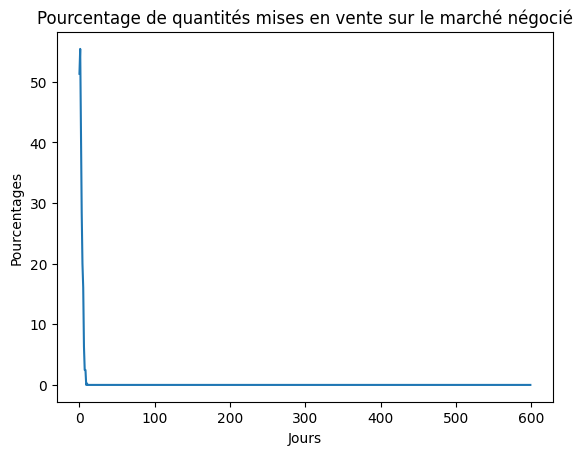

In [41]:
coeff=0.1
jours=600
k=3
b=test0(coeff,jours,k)
plt.plot([i for i in range(b[1])],b[2])
plt.xlabel("Jours")
plt.ylabel("Pourcentages")
plt.title("Pourcentage de quantités mises en vente sur le marché négocié")
plt.show()


## 1.2.Marchés choisis par un vendeur

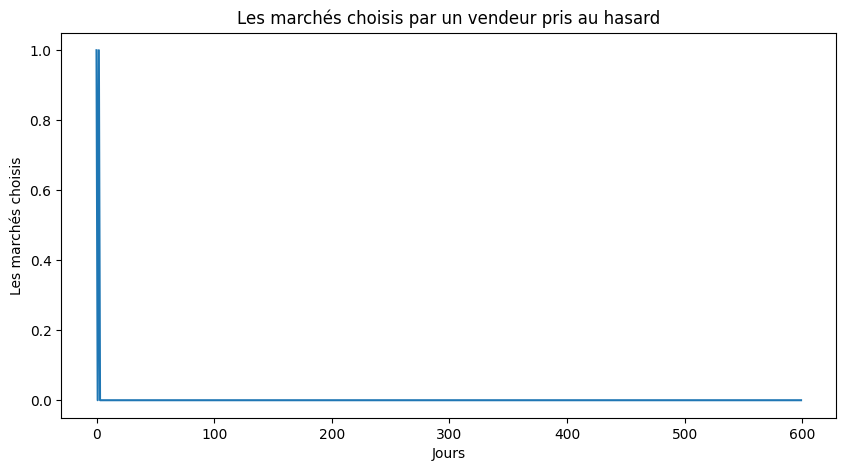

In [42]:
x=[i for i in range(b[1])]
plt.figure(figsize=(10,5))
plt.plot(x,b[0])
plt.xlabel("Jours")
plt.ylabel("Les marchés choisis")
plt.title("Les marchés choisis par un vendeur pris au hasard")
plt.show()

## 1.3 Taux de switching par vendeur

La moyenne des taux de switching est:  0.004450000000000006


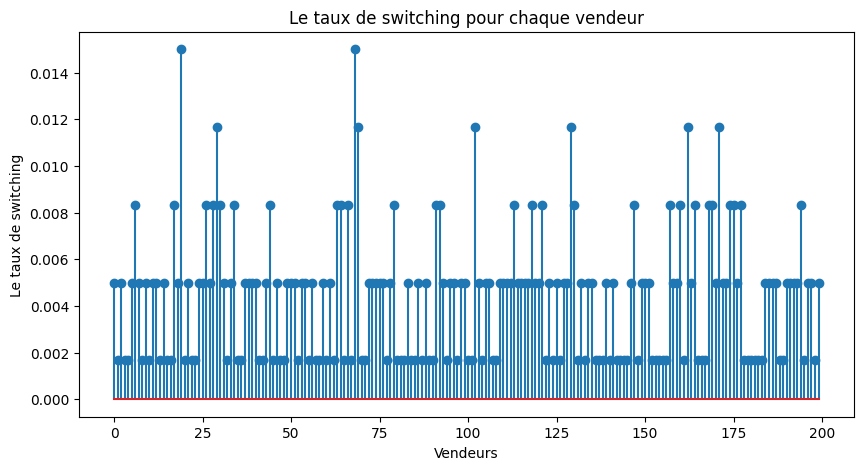

In [43]:
print("La moyenne des taux de switching est: ",b[4])
plt.figure(figsize=(10,5))
plt.stem([i for i in range(200)],b[3])
plt.xlabel("Vendeurs")
plt.ylabel("Le taux de switching")
plt.title("Le taux de switching pour chaque vendeur")
plt.show()

# 2. Equilibre du marché au cas de la différenciation des biens.

In [58]:
"""Cette partie reprend exactement le meme raisonnement que la partie précédente, sauf que les listes de demande, offre, prix plancher et prix de
reserve deviennet des listes de couples, le premier élément du couple correspond au bien rare, et la deuxieme correpond au bien courant """

class marché():
    def __init__(self,prix_a,prix_n):
        self.prix_a=prix_a
        self.prix_n=prix_n
    
    # Codes pour les vendeurs
    def revision_vend(self,p_t,offre_1_t,offre_2_t,dict,demande,coeff=0.1):
        offre=offre_1_t+offre_2_t
        p=[]
        for i in range(200):
            if len(dict[i])!=0:
                D_sum_r=sum(a[1] for a in dict[i])
                D_sum_c=sum(a[2] for a in dict[i])
                P_r=p_t[i][0]*(1+coeff*np.tanh((D_sum_r/offre[i][0])-len(dict[i])))    
                P_c=p_t[i][1]*(1+coeff*np.tanh((D_sum_c/offre[i][1])-len(dict[i])))
            else:
                P_r=p_t[i][0]*(1+coeff*np.tanh(-1)) 
                P_c=p_t[i][1]*(1+coeff*np.tanh(-1))
            p.append((P_r,P_c))
        return(p)

    def profit_t(self,p_t,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        profit=[]
        for i in range(len(p_t)):
            p_1=offre[i][1]*p_t[i][1]+offre[i][0]*p_t[i][0]            
            profit.append(p_1)
        return(profit)

    def rapports_t(self,p_t_n,offre_1_t,offre_2_t):
        profits_n=self.profit_t(p_t_n,offre_1_t,offre_2_t)
        profits_a=self.profit_t(self.prix_a,offre_1_t,offre_2_t)
        R=[]
        for i in range (200):
            r=(profits_a[i]-profits_n[i])/(profits_a[i]+profits_n[i])
            R.append(r)
        return(R)

    def marchés_t(self,R_t):
        marchés=[]
        for r in R_t:
            p=0.5*(1+r)
            marchés.append(Ber(p))
        return(marchés)

    def offre_en_négocié(self,marchés,offre_1_t,offre_2_t):
        offre=offre_1_t+offre_2_t
        S=0
        for i in range (200):
            if marchés[i]=="négocié":
                S+=offre[i][0]+offre[i][1]
        return S
    
    def marché_offre_t(self,offre_1_t,offre_2_t,R_t,prix_n):
        offre=offre_1_t +offre_2_t
        dict={}
        for i in range(200):
            dict[i]=(self.marchés_t(R_t)[i], offre[i][0], offre[i][1],prix_n[i][0],prix_n[i][1])
        return(dict)
    
    # Codes pour les acheteurs

    def couts(self,demande,reserve):
        couts=[]
        for i in range(100):
            c=demande[i][0]*reserve[i][0]+demande[i][1]*reserve[i][1]
            couts.append(c)
        return (couts)
    
    def rapport_achet(self,demande,reserve_n,reserve_a):
        rapports=[]
        couts_n=self.couts(demande,reserve_n)
        couts_a=self.couts(demande,reserve_a)
        for i in range (100):
            rapports.append((couts_n[i]-couts_a[i])/(couts_a[i]+couts_n[i]))
        return(rapports)
    
    def dict_achet(self,rapp,demande,reserve_n,reserve_a):
        dict={}
        marchés=self.marchés_t(rapp)
        for i in range(100):
            dict[i]=(marchés[i],demande[i][0],demande[i][1],reserve_n[i][0],reserve_n[i][1],reserve_a[i][0],reserve_a[i][1])
        return(dict)

def transactions_négocié(dict_achet,dict_vend,k=3):
    dicti={}
    reserve_n_r=[]
    reserve_n_c=[]
    for i in range(200):
        dicti[i]=[]
    for key,elem in dict_achet.items():     
        vendu_r=elem[3]
        vendu_c=elem[4]
        r=1
        c=1
        if elem[0]=="négocié":
            vendu_r=0
            vendu_c=0
            r=0
            c=0
            i=0
            d_r=elem[1]
            d_c=elem[2]
            while i<=k and (d_r>0 or d_c>0):                
                v=rd.randint(0,199)
                if key not in [dicti[v][i][0] for i in range (len(dicti[v]))]:
                    dicti[v].append((key,d_r,d_c))
                    vendu_r+=dict_achet[key][3]*dict_vend[v][1]
                    r+=dict_vend[v][1] 
                    vendu_c+=dict_achet[key][4]*dict_vend[v][2]
                    c+=dict_vend[v][2]                   
                    if dict_vend[v][3]<=dict_achet[key][3]:
                        d_r=max(d_r-dict_vend[v][1],0)                            
                    if dict_vend[v][4]<=dict_achet[key][4]:
                        d_c=max(d_c-dict_vend[v][2],0)                              
                    i=i+1    
        reserve_n_r.append(vendu_r/r) 
        reserve_n_c.append(vendu_c/c)
    return(dicti,list(zip(reserve_n_r,reserve_n_c)))

def Ber(param):
    s=0
    for i in range(50):
        s+=rd.random()
    if s/50<param:
        return("encheres")   
    return("négocié") 



# test
def test(coeff,jours,k):
    prix_n=[(rd.randint(9,12), rd.randint(5,6))for i in range(200)]
    prix_a=[(rd.randint(4,6), rd.randint(1,4))for i in range(200)]
    reserve_n=[(rd.randint(9,12), rd.randint(3,8) )for i in range(100)]
    reserve_a=[(rd.randint(9,12), rd.randint(3,8) )for i in range(100)]
    ma=marché(prix_n,prix_a)
    pourcentages=[]
    demande=[(rd.randint(150,300),rd.randint(150,300)) for i in range(100)]
    marchés1=[]
    marchés2=[]
    switch=[0]*200
    M1=["négocié"]*200
    for i in range (jours):
        offre_1_t=[(rd.randint(100,200),rd.randint(50,100))for i in range(100)]
        offre_2_t=[(rd.randint(50,100),rd.randint(200,400))for i in range(100)]
        total=sum((offre_2_t[i][0]+offre_2_t[i][1]+offre_1_t[i][0]+offre_1_t[i][1]) for i in range (100))
        R_t=ma.rapports_t(prix_n,offre_1_t,offre_2_t)
        R1_t=ma.rapport_achet(demande,reserve_n,reserve_a)
        marchés_vend=ma.marchés_t(R_t)
        marchés_achet=ma.marchés_t(R1_t)
        offre_n=ma.offre_en_négocié(marchés_vend,offre_1_t,offre_2_t)
        pourcentage_n=offre_n/total
        pourcentages.append(pourcentage_n*100)
        d1=ma.dict_achet(R1_t,demande,reserve_n,reserve_a)
        d2=ma.marché_offre_t(offre_1_t,offre_2_t,R_t,prix_n)
        if d2[50][0]=="négocié":
            marchés1.append(1)
        else:
            marchés1.append(0)
        if d2[150][0]=="négocié":
            marchés2.append(1)
        else:
            marchés2.append(0)
        for vend in range(200):
            if d2[vend][0]!=M1[vend]:
                switch[vend]+=1
        switch_moy=[i/jours for i in switch]
        dicti=transactions_négocié(d1,d2,k)[0]
        reserve_n=transactions_négocié(d1,d2,k)[1]
        r=sum(d1[key][3] for key in range (100) if d1[key][0]=="encheres")
        c=sum(d1[key][4] for key in range (100) if d1[key][0]=="encheres")
        t=len([key for key in range (100) if d1[key][0]=="encheres"])
        reserve_a=[(r/t,c/t)]*100
        prix_n=ma.revision_vend(prix_n,offre_1_t,offre_2_t,dicti,demande,coeff)  
        demande=[(rd.randint(150,300),rd.randint(150,300)) for i in range(100)]
        M1=[elem[0] for key,elem in d2.items()]  
    moy1=sum(switch_moy[i] for i in range(100))/100
    moy2=sum(switch_moy[i] for i in range(100,200))/100
    return(marchés1,marchés2,jours,pourcentages,switch_moy,moy1,moy2)

# 2.1.Quantités vendues sur le marché négocié

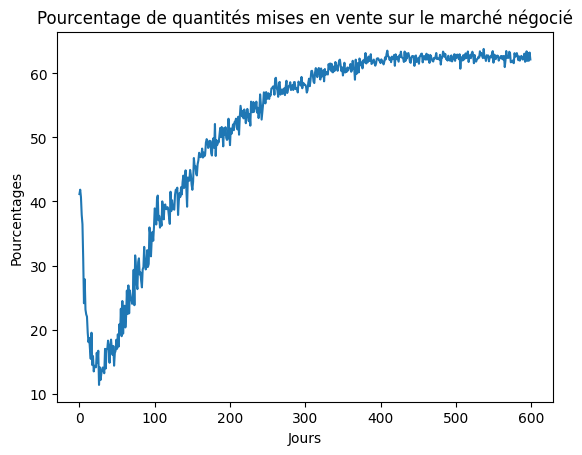

In [60]:
coeff=0.1
jours=600
k=3
b=test(coeff,jours,k)
plt.plot([i for i in range(b[2])],b[3])
plt.xlabel("Jours")
plt.ylabel("Pourcentages")
plt.title("Pourcentage de quantités mises en vente sur le marché négocié")
plt.show()

## 2.2.Marchés choisis par deux vendeurs de groupes différents

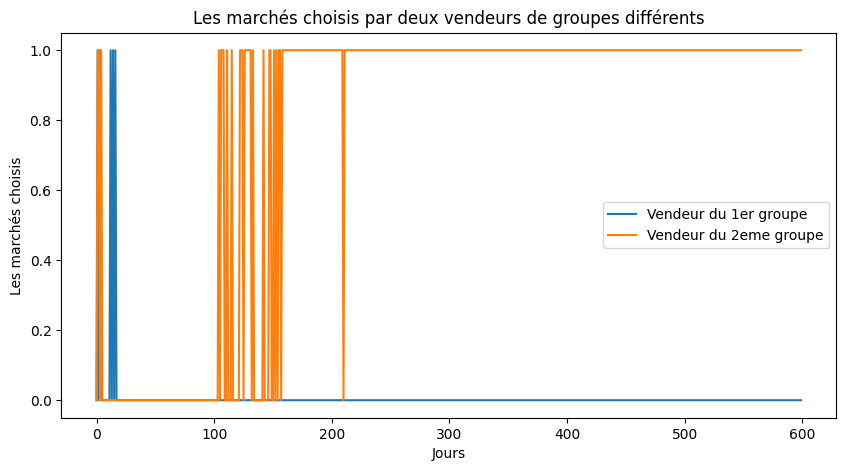

In [61]:
x=[i for i in range(b[2])]
plt.figure(figsize=(10,5))
plt.plot(x,b[0], label="Vendeur du 1er groupe")
plt.plot(x,b[1], label="Vendeur du 2eme groupe")
plt.xlabel("Jours")
plt.ylabel("Les marchés choisis")
plt.title("Les marchés choisis par deux vendeurs de groupes différents")
plt.legend()
plt.show()

## 2.3.Taux de switching pour chaque vendeur

La moyenne de switching chez les vendeurs du 1er groupe est:  0.015499999999999988
La moyenne de switching chez les vendeurs du 2eme groupe est:  0.050499999999999996


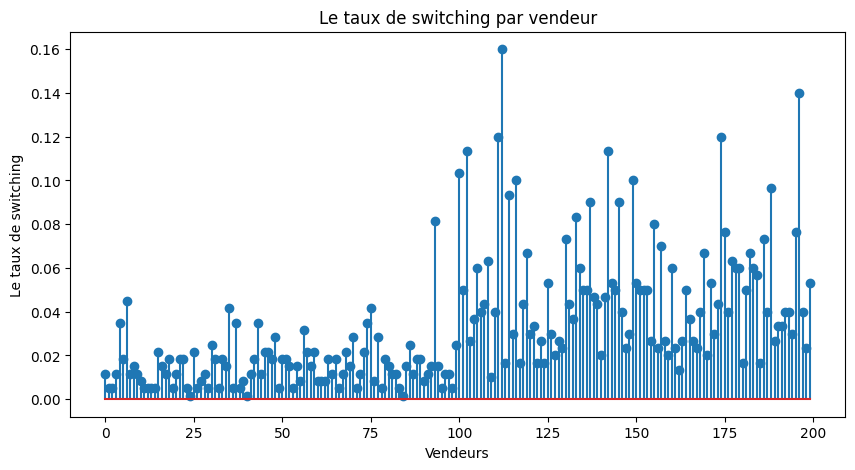

In [62]:
print("La moyenne de switching chez les vendeurs du 1er groupe est: ", b[5])
print("La moyenne de switching chez les vendeurs du 2eme groupe est: ", b[6])
plt.figure(figsize=(10,5))
plt.stem([i for i in range(200)],b[4])
plt.xlabel("Vendeurs")
plt.ylabel("Le taux de switching")
plt.title("Le taux de switching par vendeur")
plt.show()